# Linear Regression

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [28]:
df = pd.read_csv('weight-height.csv')

In [29]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


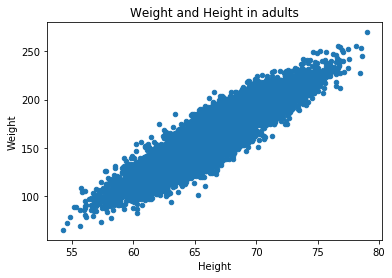

In [30]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')

In [31]:
X = df[['Height']].values
y_true = df['Weight'].values

In [32]:
y_true

array([ 241.89356318,  162.31047252,  212.74085556, ...,  128.47531878,
        163.85246135,  113.64910268])

## Linear Regression with Keras

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam, SGD

In [52]:
model = Sequential()

In [53]:
model.add(Dense(1, input_shape=(1,)))

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [55]:
model.compile(Adam(lr=0.8), 'mean_squared_error')

In [56]:
model.fit(X, y_true, epochs=40)

Epoch 1/40
10000/10000 [==============================] - 0s - loss: 1204.7332     
Epoch 2/40
10000/10000 [==============================] - 0s - loss: 562.0402     
Epoch 3/40
10000/10000 [==============================] - 0s - loss: 526.6409     
Epoch 4/40
10000/10000 [==============================] - 0s - loss: 502.9985     
Epoch 5/40
10000/10000 [==============================] - 0s - loss: 469.4185     
Epoch 6/40
10000/10000 [==============================] - 0s - loss: 402.3636     
Epoch 7/40
10000/10000 [==============================] - 0s - loss: 368.3943     
Epoch 8/40
10000/10000 [==============================] - 0s - loss: 346.5301     
Epoch 9/40
10000/10000 [==============================] - 0s - loss: 313.8169     
Epoch 10/40
10000/10000 [==============================] - 0s - loss: 274.4651     
Epoch 11/40
10000/10000 [==============================] - 0s - loss: 269.2388     
Epoch 12/40
10000/10000 [==============================] - 0s - loss: 244.3623     


In [41]:
y_pred = model.predict(X).ravel()

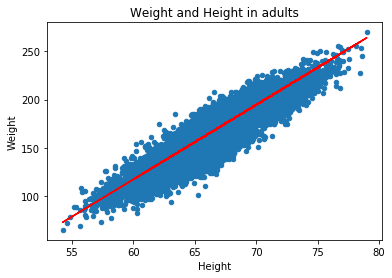

In [42]:
df.plot(kind='scatter',
        x='Height',
        y='Weight',
        title='Weight and Height in adults')
plt.plot(X, y_pred, color='red')

In [43]:
W, B = model.get_weights()

In [44]:
W

array([[ 7.75130844]], dtype=float32)

In [45]:
B

array([-348.02932739], dtype=float32)

### Save Keras Model


In [46]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [47]:
model.save('HeightWidth_model.h5')

### Export Model using CoreML Tools


In [2]:
from keras.models import load_model  
model = load_model('HeightWidth_model.h5')  

Using TensorFlow backend.


In [3]:
import coremltools

In [8]:
?coremltools.converters.keras.convert(model)

In [14]:
coreml_model = coremltools.converters.keras.convert(model, input_names="input", output_names="output")

AttributeError: 'module' object has no attribute 'mobilenet'

In [50]:
coreml_model.save('HeightWidth_model.mlmodel')

NameError: name 'coreml_model' is not defined

In [10]:
import keras  
print keras.__version__  
print keras.__path__


2.0.4
['/Users/Jacopo/anaconda/envs/KerasTensorFlowCoreML/lib/python2.7/site-packages/keras']


In [20]:
# Make a Keras model
model2 = Sequential()
# model2.add(Dense(1, input_dim = input_dim))
model2.add(Dense(1, input_shape=(1,)))
model2.mobilenet = "no"
coreml_model2 = coremltools.converters.keras.convert(model2)


AttributeError: 'module' object has no attribute 'mobilenet'